[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cahemobu97/AI4ENG/blob/main/01_Exploración_de_datos.ipynb)


**Esta primera parte del proyecto consta del análisis exploratorio de los datos, con el fin de entender la información que se tienen del dataset y poder darle el mejor manejo para cumplir con los requermientos que se piden en el proyecto.**



In [35]:
#En este primer paso vamos a importar las librerias necesarias para hacer la exploración de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importacion de Bibliotecas de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,KFold,GroupKFold
import lightgbm as lgb
import gc


import warnings
warnings.filterwarnings('ignore')

In [1]:
#Vamos a proceder a cargar el dataset a utilizar desde Kaggle.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [3]:
#Procedemos a descargar el dataset que tenemos en kaggle
!kaggle datasets download -d emmanuelfwerr/thyroid-disease-data

  0% 0.00/145k [00:00<?, ?B/s]
100% 145k/145k [00:00<00:00, 55.5MB/s]


In [24]:
#En este paso vamos extraer el CSV que contiene el dataset
!unzip thyroid-disease-data.zip

Archive:  thyroid-disease-data.zip
replace thyroidDF.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: thyroidDF.csv           


In [25]:
#Vamos a leer los datos que tiene el dataset para empezar con el análisis explorartorio
df = pd.read_csv("thyroidDF.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [26]:
df.shape

(9172, 31)

Como podemos observar en nuestro dataset, cumplimos con la condición de que existan al menos 5000 instancias y 30 columnas, ya que para nuestro proyecto tenemos 9172 instancias o filas y 31 columnas.

In [27]:
#En este paso vamos a poder observar toda la información relacionada al dataframe que hemos cargado
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [32]:
check_for_any_nan= df.isna().any().any()#Vamos a encontrar cuantos valores NaN existen en nuestro dataframe
total_nan_values = df.isna().sum().sum()#Vamos a sumar el total de valores NaN presentes en el dataframe

print("Existen valores en NaN: "+str(check_for_any_nan))
print("Total de valores en NaN: "+str(total_nan_values))

Existen valores en NaN: True
Total de valores en NaN: 14629


Al chequear si existen valores en NaN, podemos ver que si existen y que tenemos 14629 valores en NaN, por lo que si hacemos cuentas, quitan la columan del id del paciente, tendriamos 30 columnas x 9172 filas lo que corresponde a 275,160 datos. Al evaluar cuantos valores NaN tenemos, se puede ver que son 14,629, por lo que este valor total de datos corresponde al 5,316% de datos faltantes respecto al total. Por lo que cumplimos tambien con la otra condición.

In [92]:
df_by_sex_count = df.groupby('sex').count()["patient_id"]#Se agrupara por sexo para contar cuantos pacientes femeninos o masculinos existen
print (df_by_sex_count)
print ("El numero total de pacientes que con edad registrada es: " +str (df_by_sex_count.sum()))#Es el numero total de pacientes registrados con edad en el dataset


sex
F    6073
M    2792
Name: patient_id, dtype: int64
El numero total de pacientes que con edad registrada es: 8865


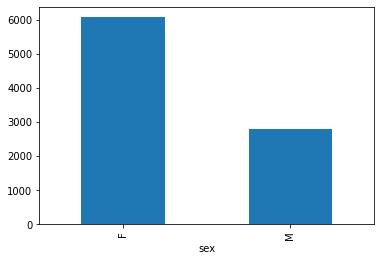

In [83]:
df_by_sex_count = df.groupby('sex').count()["patient_id"].plot(kind='bar')#Grafica de barras para evalular el resultado anterior

In [90]:
#Ahora vamos a hacer una análisis mas profundo de los datos, sacando gráficas que nos permitan interprestar los datos,
#tendremos el promedio de edad por sexo de los pacientes
df_by_sex = df.groupby('sex').mean()["age"]
df_by_sex


sex
F    63.069159
M    98.929083
Name: age, dtype: float64

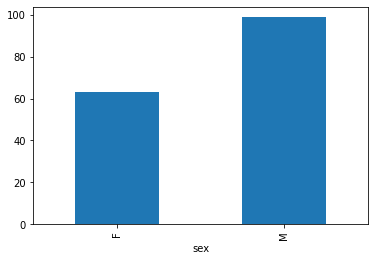

In [91]:
df_by_sex = df.groupby('sex').mean()["age"].plot(kind='bar')#Graficamos el promedio de edad por sexo

En un acercamiento inicial se puede observar que hay mas mujeres que hombres en el dataset, pero es un poco preocupante ver que los hombres al tener un 32.5% respecto al 100% de participantes poseen un promedio de edad mucho mas grande correspondiente 98 años. Ahora vamos a ver cuantos de estos hombres y mujeres padecen enfermdad de tiorides y cuales serán las métricas a usar.

In [50]:
dataframe=df['target'].unique().tolist()
name=sorted(dataframe)
print(name)
N=list(range(len(name)))
normal_mapping=dict(zip(name,N)) 
reverse_mapping=dict(zip(N,name))
df['target']=df['target'].map(normal_mapping)

['-', 'A', 'AK', 'B', 'C', 'C|I', 'D', 'D|R', 'E', 'F', 'FK', 'G', 'GI', 'GK', 'GKJ', 'H|K', 'I', 'J', 'K', 'KJ', 'L', 'LJ', 'M', 'MI', 'MK', 'N', 'O', 'OI', 'P', 'Q', 'R', 'S']
